# pandas.DataFrame.boxplot(by="class", ...) doesn't plot correctly

## Problem description, pandas=0.24.2
I want to use pandas.DataFrame.boxplot(by="class", ...) but it doesn't work properly
Here is the expected and correct plot![expected_plot](./correct-boxplot.png)

And here is the boxplot I got when my classes were in cyrillic: ![incorrect_plot](incorrect-boxplot.png)

In [1]:
import pandas
from pandas import DataFrame
from pandas import Series
import seaborn
from matplotlib import pyplot
from matplotlib import axes
import matplotlib

In [2]:
pandas.__version__

'0.24.2'

In [3]:
pandas.set_option('precision', 2)

In [4]:
dataSetCyrillic: DataFrame = pandas.read_csv("raw_data-cyrillic.csv")
dataSetCyrillic.index = Series([i for i in range(1, 19)]).astype(int)
dataSetCyrillic

,field A,field B,field C,field D,class
1,48,3.64,10.8,6.5,контроль
2,38,3.71,18.0,9.6,контроль
3,47,3.59,17.9,10.2,контроль
4,38,4.32,11.8,7.4,контроль
5,40,3.56,10.8,6.7,контроль
6,47,4.01,13.5,9.7,контроль
7,45,4.02,8.7,10.2,група Х
8,43,4.09,11.1,9.0,група Х
9,38,4.01,12.8,7.1,група Х
10,58,4.05,15.2,12.1,група Х


In [5]:
dataSetEnglish: DataFrame = pandas.read_csv("raw_data-english.csv")
dataSetEnglish.index = Series([i for i in range(1, 19)]).astype(int)
dataSetEnglish

,field A,field B,field C,field D,class
1,48,3.64,10.8,6.5,control
2,38,3.71,18.0,9.6,control
3,47,3.59,17.9,10.2,control
4,38,4.32,11.8,7.4,control
5,40,3.56,10.8,6.7,control
6,47,4.01,13.5,9.7,control
7,45,4.02,8.7,10.2,group X
8,43,4.09,11.1,9.0,group X
9,38,4.01,12.8,7.1,group X
10,58,4.05,15.2,12.1,group X


## Using cyrillic letters. It DOES NOT work correctly. Pay attention to field C

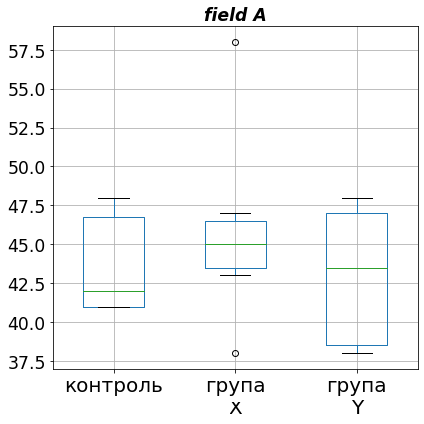

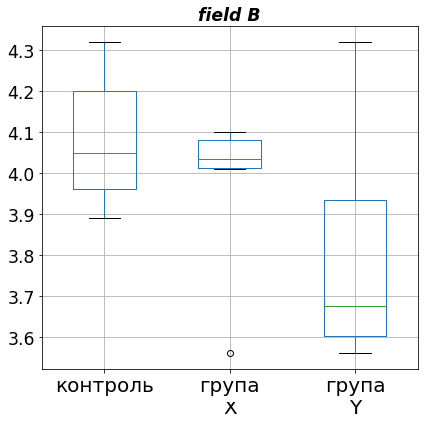

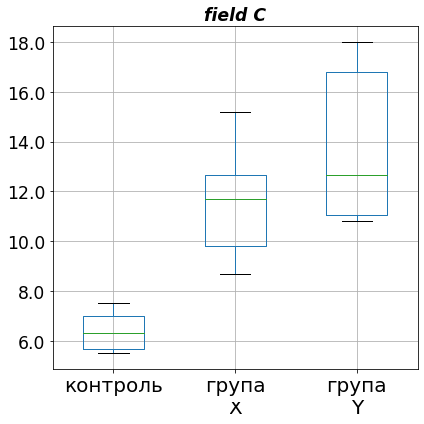

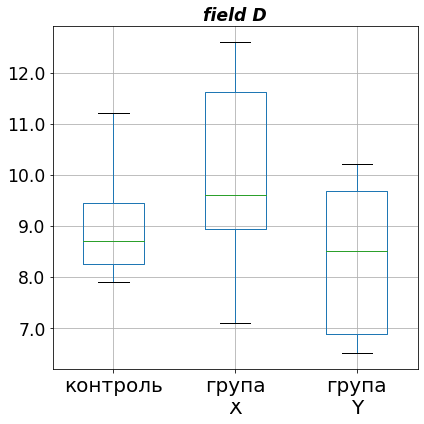

In [6]:
for col in list(dataSetCyrillic.columns[:-1]):
    fig, ax = pyplot.subplots(figsize=(6, 6))
    dataSetCyrillic.boxplot(column=[col], 
                        by="class", 
                        ax=ax, 
                        widths=0.5)
    tmp = map(lambda x: x.replace(" ", "\n", 1), dataSetCyrillic["class"].unique())
    ax.set_xticklabels(tmp, fontsize="20")
    ax.set_yticklabels(ax.get_yticks(), fontsize="xx-large")
    ax.set_title(label=col, fontsize="xx-large", fontstyle="oblique", fontweight="bold")
    pyplot.xlabel("")
    pyplot.suptitle("")
    fig.tight_layout()

## Now using english letter. This time it works correctly. Pay attention to field C

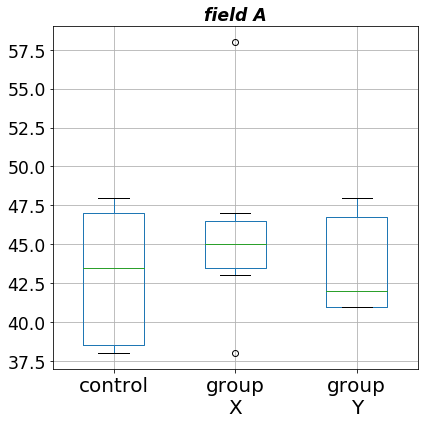

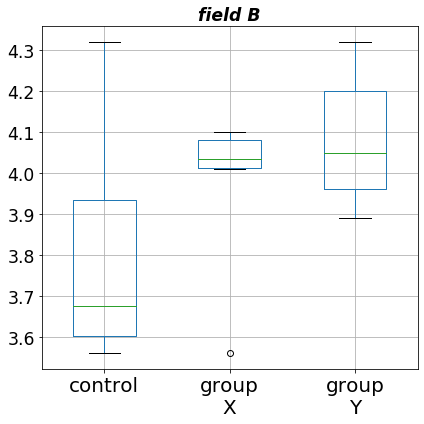

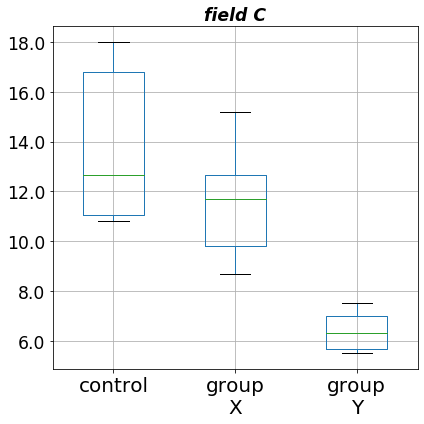

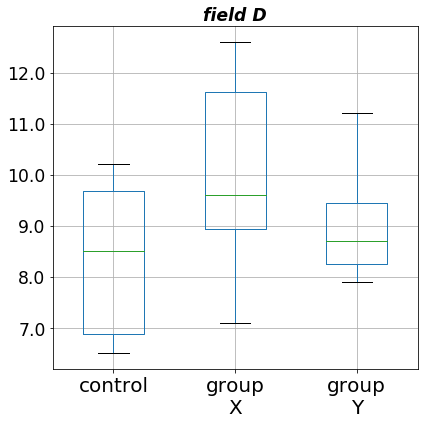

In [7]:
for col in list(dataSetEnglish.columns[:-1]):
    fig, ax = pyplot.subplots(figsize=(6, 6))
    dataSetEnglish.boxplot(column=[col], 
                        by="class", 
                        ax=ax, 
                        widths=0.5)
    tmp = map(lambda x: x.replace(" ", "\n", 1), dataSetEnglish["class"].unique())
    ax.set_xticklabels(tmp, fontsize="20")
    ax.set_yticklabels(ax.get_yticks(), fontsize="xx-large")
    ax.set_title(label=col, fontsize="xx-large", fontstyle="oblique", fontweight="bold")
    pyplot.xlabel("")
    pyplot.suptitle("")
    fig.tight_layout()

## seaborn always plots as it should

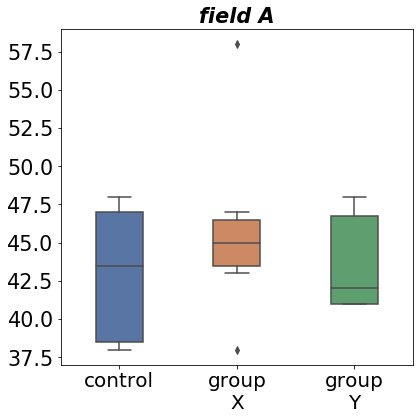

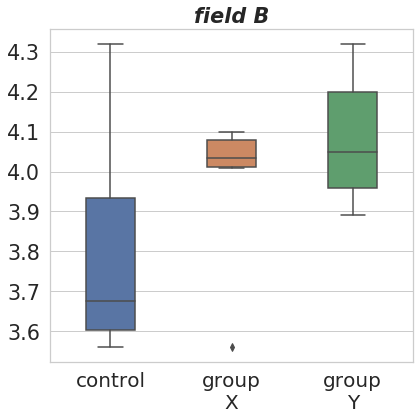

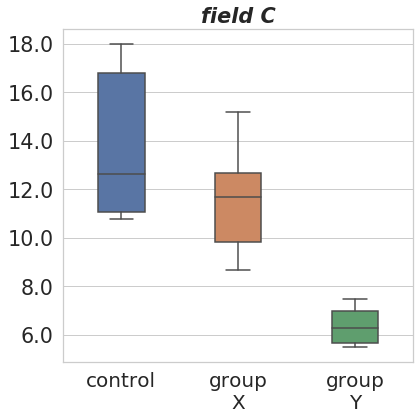

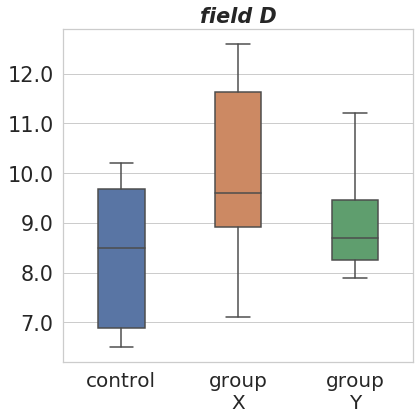

In [8]:
for col in list(dataSetEnglish.columns[:-1]):
    fig, ax = pyplot.subplots(figsize=(6, 6))
    seaborn.set(style="whitegrid")
    seaborn.boxplot(x="class", y=col, data=dataSetEnglish, width=0.4)
    tmp = map(lambda x: x.replace(" ", "\n", 1), dataSetEnglish["class"].unique())
    ax.set_xticklabels(tmp, fontsize="20")
    ax.set_yticklabels(ax.get_yticks(), fontsize="xx-large")
    ax.set_title(label=col, fontsize="xx-large", fontstyle="oblique", fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")
    fig.suptitle("")
    fig.tight_layout()